<a href="https://colab.research.google.com/github/kobestenson/COMPPHYS/blob/main/Kobe_Stenson_Lab05_Part1__Simple_Harmonic_Motion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 5, Part 1: Collect Data and Plot Solution

* In the first part of this week's lab, we will collect data for the position of a mass oscillating on a spring as a function of time.

* The general solution to describe the motion of a mass oscillating on a spring is
$$ x(t) = A cos(\omega t - \phi) $$

* Describe the meaning of each term in the table below: (2 points)

| Symbol | Name |Units | Description |
|----------|----|------|-----|
| x        | position | m | position of mass |
| A        |  Amplitude  | m | height of oscillation |
| $\omega$ |  Angular Frequency  | rad/sec | net change of angle per unit of time |
| $\phi$   |  Phase Constant  | radians | change in phase per unit |

## 0. Import modules

In the cell below, import numpy and matplotlib

In [ ]:
# import your modules here
import numpy as np
import matplotlib.pyplot as plt


## 1. Collecting Your Data

* Obtain some position vs. time data for a simple harmonic oscillator (mass on spring).

### Procedure

(3 pts)

* Briefly describe the procedure you used to set up your system and collect your data.  

We used the graphical analysis pro to record the oscillations from our setup. We set the logger to track data for a period of 10 seconds.

* Take a picture of your experimental setup and upload it here.


**Your Answer Here**

In [ ]:
from matplotlib import image
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Screen Shot 2024-02-19 at 4.50.42 PM.png to Screen Shot 2024-02-19 at 4.50.42 PM.png


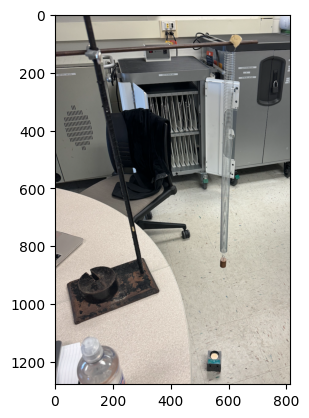

In [ ]:
myimage1 = image.imread("Screen Shot 2024-02-19 at 4.50.42 PM.png")

plt.imshow(myimage1)

## 2. Upload Data Into Colab

(2 points)

* In the bottom left of your window, click on the `<>` icon to access `Code snippets`.

* Select `Open files from your local file system`, then `Insert`.

* Select your data files to upload, and upload them.



In [ ]:
# upload your data



In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving csv-export (2).csv to csv-export (2) (1).csv
User uploaded file "csv-export (2) (1).csv" with length 23275 bytes


In [ ]:
# use astropy to read in your data file
from astropy.table import Table
data = Table.read("csv-export (2).csv")


* Save the time and position variables as more conveniently named arrays
* Subtract the average from the position

In [ ]:
data

Data Set 1:Time(s),Data Set 1:Position(m),Data Set 1:Velocity(m/s),Data Set 1:Acceleration(m/s²),Data Set 2:Time(s),Data Set 2:Position(m),Data Set 2:Velocity(m/s),Data Set 2:Acceleration(m/s²),Data Set 3:Time(s),Data Set 3:Position(m),Data Set 3:Velocity(m/s),Data Set 3:Acceleration(m/s²)
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0.0,0.5824999809265137,0.03922263781229655,-0.907177605010845,0.0,0.492000013589859,0.04866646395789253,1.6727969694284746,0.0,0.6233999729156494,-0.14183332522710165,0.02671779121881658
0.05,0.5852000117301941,0.007777959108352661,-1.3532481094201405,0.05,0.49230000376701355,0.12041649056805505,1.7936398631628645,0.1,0.608299970626831,-0.13537496328353882,-0.0172035998584311
0.1,0.5863000154495239,-0.062300145626068115,-2.0045023328728147,0.1,0.49709999561309814,0.24119983116785684,1.5561036462033233,0.2,0.597599983215332,-0.14089996616045633,-0.05322914156648847
0.15,0.582099974155426,-0.189666748046875,-2.5585616242002556,0.15,0.517799973487854,0.3308333953221639,0.4158381832602584,0.3,0.5813999772071838,-0.1546666357252333,-0.00859486560026807
0.2,0.5701000094413757,-0.3651666972372267,-1.981347692601475,0.2,0.5371000170707703,0.2933889461888207,-1.0623789118763838,0.4,0.5652999877929688,-0.1544999579588572,0.14990437039990478
0.25,0.5432999730110168,-0.4757222202089098,-0.04832940337098654,0.25,0.5497999787330627,0.19288894202974113,-1.4845268437523904,0.5,0.5476999878883362,-0.12516662478446963,0.34399856433824255
0.3,0.5126000046730042,-0.3898887832959493,2.435267630182667,0.3,0.5550000071525574,0.11005580425262451,-1.1082138893780888,0.6,0.5390999913215637,-0.08099993069966635,0.49896070664679565
0.35,0.498199999332428,-0.17638895246717665,3.1893478241967568,0.35,0.5587000250816345,0.06794452667236327,-0.5556725480674226,0.7,0.5309000015258789,-0.02274990081787109,0.636991284051795
0.4,0.4991999864578247,-0.01700003941853841,2.729542483518152,0.4,0.5605000257492065,0.06188866164949205,-0.09788426720065835,0.8,0.5343000292778015,0.041916651858223804,0.7295560781602504


In [ ]:
# save the time and position data
time = data["Data Set 3:Time(s)"]
position = data["Data Set 3:Position(m)"]

# subtract the mean of the position from the position

mean_pos = position - np.mean(position)

## 3. Visualize and Analyze Your Data

(5 points)

### Plot Your Data
* Make a plot of position vs. time using python.

Text(0, 0.5, 'Position (m)')

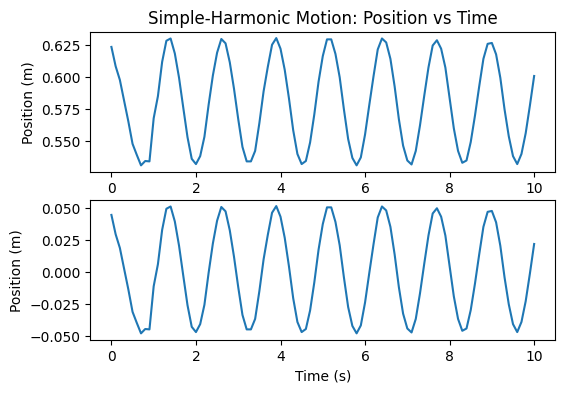

In [ ]:
# code to plot your position vs time data here
plt.figure(figsize=(6,4))
plt.subplot(2,1,1)
plt.plot(time,position)
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.title('Simple-Harmonic Motion: Position vs Time')

plt.subplot(2,1,2)
plt.plot(time,mean_pos)
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')


### Determine Parameters of Analytic Solution



* From your plot of position vs time, you should be to estimate the amplitude $A$ and the period $T$ of the motion.

* Briefly describe how you measured these values, and enter your values in the cell below.

We used the values from our mean position vs time graphs.



In [ ]:
# values of period and amplitude from the graph

A = 0.05 # amplitude in m
T = 1.275 # period in sec


#### Calculate $\omega$

In the cell below, calculate $\omega$ from your measured value of the period.

In [ ]:
# calculate omega

omega = 2*np.pi/T

In [ ]:
print(omega)

4.927988476219284


#### Plot data and Analytic Solution

(5 points)

* copy your code for plotting the position versus time
* add code to overplot the analytic solution

* Determine the best value of $\phi$ using trial and error.


In [ ]:
# write a function to calculate the position of the SHO
# input = A, omega, phi, t
# return = position
def calculate(A, omega, phi, time):
  position = A*np.cos(omega*time-phi)
  return position


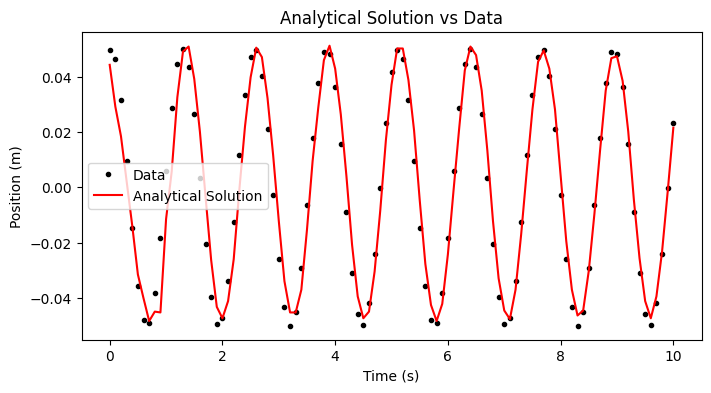

In [ ]:
# enter your code to plot your data and analytic solution
# be sure to use your function


pos = calculate(A, omega, 0.1, time)
plt.figure(figsize=(8,4))
plt.plot(time,pos,'k.',label='Data')
plt.plot(time,mean_pos,color='red',label='Analytical Solution')
plt.title('Analytical Solution vs Data')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.legend()

#### Calculate the spring constant and intial conditions

(3 points)

From your fit, and anything else you need to measure, determine:
* the spring constant, $k$
* the initial position, $x_0$
* the initial velocity, $v_{x0}$


In [ ]:
# calculate spring constant
m = 0.1
T = 1.275

k= m*omega**2
print(f'{k:.2f}')

2.43


In [ ]:
# calculate intial position here
x0 = mean_pos[0]
print(f'{x0:.2f} m')

0.04 m


In [ ]:
# calculate the intial velocity here
v0 = (mean_pos[1]-mean_pos[0])/(time[1]-time[0])
print(f'{v0:.2f} m/s')

-0.15 m/s
